In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

c:\users\ghinarosa\appdata\local\programs\python\python38-32\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ghinarosa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import re, string, unicodedata  #modul regular expression
import nltk
nltk.download('punkt')
from nltk import word_tokenize, sent_tokenize  #Paket ini membagi teks input menjadi kata-kata.,                                  
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ghinarosa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
stop_words = stopwords.words('indonesian')
stop_words.extend([ 'hii' , 'and' , 'ya' , 'yang' , 'mau' , 'yuk' , 'haii' , 'aja' , 'no' ,
'basa' , 'basi' , 'beby' , 'di', 'malam' , 'ini' , 'enak' , 'yukk' 
'full' , 'yah' , 'toto988' , 'bonus' , 'deposit' , 'harian' , 'sabung' ,
'ayam' , 'untuk' , 'boking' , 'morning' , 'hanya' , 'info' , 'wajib'
, 'dp' , 'rr' , 'fast' , 'respon' , 'mnt' , 'minta' , 'pilih' , 'lngsung' ,
'lanjut' , 'wa' , 'req' , 'sofia' , 'info' , 'lebih' , 'lanjut' , 'atau' ,
'bisa', 'langsung' , 'my' , 'inbox' , 'ig' , 'line' , 'bagi' , 'sudah' 
, 'done' , 'tranfer' , 'kirim' , 'niarriska_' , 'niar_riska' , 'niar_sari12' 
, 'msniarriska_' , 'ad' , 'bio' , 'setiap' , 'hari' , 'senin' , 'selasa' , 'jumat' ,
'minggu' , 'ak' , 'now' , 'yaa' ,'or' ,'jamin' , 'sini' , 'barang' , 'jockosrocket' , 
'zonawaria' , 'massas' , 'q' , 'yok' , 'yurayura' , 'uda' , 'cus' , 'kak' , 'mlm' ,
'modus' , 'hallo' ,'all' , 'lgsg' , 'lgi' , 'pagi' , 'ka' , 'yu' , 'isi' , 'skrg' , 'yg' , 
'bca' ,'rek' , 'via' , 'dulu' , 'oke' , 'sepi' , 'amat' ,'yak' , 'follow' , 'guys' , 'kalian' ,
'semua' , 'absen' , 'dong' , 'tetap' , 'gini' , 'beib' , 'bangett' , 'kuy' , 'semanagat' , 'selamat' ,
'k' , 'kmren' , 'lg' , 'nyanyi' , 'hajatan' , 'acara' , 'kelabu' ,
'lfllfllflfllffllflflflflflflflflfllflflflflflflflflflflflflflflflflflflflflflflflflflflflflfllflflflflflflflflfllflfllflflflflflflfllflflflflflllfl' , 
'yaudah' , 'biarin' , 'bahagia' , 'bogor' , 'banyalk' ,'banyak' , 'menang' , 'gak' ,'usah' , 'hai' , 
'notip' , 'niarriska' ,  'niar' , 'riska' , 'twr' ,' msniarriska' , 'aviliblenow' , 'jum' , 'at' , 
'accound' , 'in' , 'for' , 'a' , 'sayyy' , 'nih' , 'yura' , 'ribet' , 'daerah' , 'masuk' , 'mnit' ,
'dgnku' , 'lupa' , 'nikahan' , 'lfllflffllfllflflflfllffllflfllflflfllflflflfllffllflfflfllfllflfl' , 'lfl' , 
'likeforlikes' , 'likeforfollow' , 'fransiska' , 'terbesar' , 'komisi' , 'say' ,'yukk' , 'udah' , 'klo' , 'nggak', 'msniarriska'  ])

In [6]:
stop_words

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [7]:
#import dataset
import pandas as pd

df = pd.read_excel(r'C:\Users\Ghinarosa\Desktop\GEMASTIK\availvcs.xlsx')

In [8]:
df.head(20)

,text
0,HII\nRATE AND RULES PERMANENT YA\n.\n.\n\n#ava...
1,Avail Vcs only trusted .... NO BASA BASI \n#vc...
2,Avail Vcs only trusted .... NO BASA BASI \nLan...
3,Hii\nYuk yang mau VCS / BO / ORDER VIDEO PRIBA...
4,Avail Vcs only trusted .... NO BASA BASI \nLan...
5,"AVAIL VCS, CS & VIDIO SAY DI ORDER YA, FAST RE..."
6,AVAILIBLE VCS BEBY. FAST RESPON WA-(0821-6434-...
7,Avail Vcs only trusted .... NO BASA BASI \nLan...
8,"Haii,open #vcsbugil dan #bo \nInfo tarif slot ..."
9,Avail Vcs only trusted .... NO BASA BASI \n#vc...


In [9]:
#preprocessing
def removeStopword(str):
    stop_wordss = set(stop_words)
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in stop_wordss]
    return ' '.join(filtered_sentence)
#remove sentence which contains only one word
def removeSentence(str): 
    word = str.split()
    wordCount = len(word)
    if(wordCount<=1):
        str = ''
    
    return str
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
    #remove email
    str = re.sub('\S*@\S*\s?', '', str) 
       
    return str
def preprocessing(str):
    str = removeSentence(str)
    str = cleaning(str)
    str = removeStopword(str)
    
    return str

In [10]:
#test the code
sentences = ["Open vcs Sofia rr info lebih lanjut DM aja atau bisa langsung chat my wa Sofia aja ya 082281014265 inbox #availvcs #openrp #opensay #open #vcshot  #avail  #vcsviarekning #vcso #bussiness #bussy #business #available #ceweindonesia #cewekcakep #cewekcb  #cewekindo #crott #pap #vcscew  #cewekhitsmasakini #cewe #groupvcs #vcs2017 #vcsmalaysia #cewekdugem #vcs2018 #availmalaysia #vcs2015 #vcs2016 #trustedsellermalaysia"
 ]
for st in sentences:
    r = preprocessing(st)
    print(r)

open vcs dm chat availvcs openrp opensay open vcshot avail vcsviarekning vcso bussiness bussy business available ceweindonesia cewekcakep cewekcb cewekindo crott pap vcscew cewekhitsmasakini cewe groupvcs vcsmalaysia cewekdugem availmalaysia trustedsellermalaysia


In [11]:
#do preprocessing
import pandas as pd
import xlsxwriter
fo = pd.read_excel((r'C:\Users\Ghinarosa\Desktop\GEMASTIK\availvcs.xlsx')) #read excel file
txt = fo['text']
workbook = xlsxwriter.Workbook('availvcs-clean3.xlsx')
worksheet = workbook.add_worksheet()
row = 0
col = 0
rowHeaders = ['text']
worksheet.write_row(row, col,  tuple(rowHeaders))
        
for t in txt:
    new_txt = preprocessing(t)
    rowValues = [new_txt]
    row += 1
    worksheet.write_row(row, col, tuple(rowValues))
    
workbook.close()


4 -5.302958850747955 0.6031592027924926
    Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0             0             0.0              0.7600   
1             1             0.0              0.9981   
2             2             0.0              0.9981   
3             3             2.0              0.8551   
4             4             0.0              0.9981   
5             5             0.0              0.6016   
6             6             3.0              0.7323   
7             7             0.0              0.9981   
8             8             2.0              0.9989   
9             9             0.0              0.9981   
10           10             0.0              0.9983   
11           11             0.0              0.9981   
12           12             2.0              0.7119   
13           13             2.0              0.8526   
14           14             0.0              0.8889   
15           15             0.0              0.5655   
16           16          

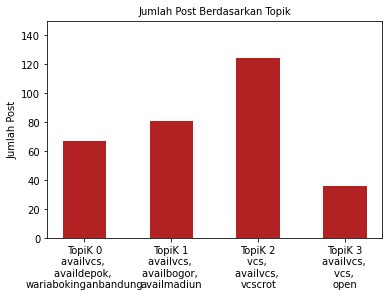

In [26]:
# -*- coding: utf-8 -*-
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

random_state = 0 

doc_set = """
"rate rules permanent availbo availvcs availjaksel jakartaselatan cewekbooking wanitaidaman vcsreal boreal openbo openvcs
avail vcs only trusted vcstarif availvcs vcsonlygirl amovcs vcsmalaysia vcsemprelinda openmember openhouse available availindonesia availbali codavailable
avail vcs only trusted dm vcstarif availvcs vcsonlygirl amovcs vcsmalaysia vcsemprelinda openmember openhouse available availindonesia availbali codavailable
vcs bo order video pribadi bareng dm pembayaran pulsa rekening openbo openvcs vcsreal availbo availjaksel availvcs
avail vcs only trusted dm vcstarif availvcs vcsonlygirl amovcs vcsmalaysia vcsemprelinda openmember openhouse available availindonesia availbali codavailable
avail vcs cs vidio order availvcs availiblenow availible busy bussy urgent work trusted vcsjanda vcswhatsap vcsfull vcslife vcsreall realakun readyvcs vidiodewasa vidioseksi cweknakal cwe tantegoyang tantegatal gadismontok
availible vcs vcsange availvcs busy available availablenow real realvc sukasangek omsange tantegirangjakarta tantekos cwe cwek cweknakal
avail vcs only trusted dm vcstarif availvcs vcsonlygirl amovcs vcsmalaysia vcsemprelinda openmember openhouse available availindonesia availbali codavailable
open vcsbugil bo tarif slot tipu tipu fake dijamin vcsbugil vcsreal realakun vcscolmek vcsbugil availvcs vcstrusted vcswhatsapp vcsindonesia vcsbugil chatseks vcshot vcsyuk vcscrott mesumoaleer openbo skandal bojatim lfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfl
avail vcs only trusted vcstarif availvcs vcsonlygirl amovcs vcsmalaysia vcsemprelinda openmember openhouse available availindonesia availbali codavailable
vcs real avail vcs only trusted vcstarif availvcs vcsonlygirl amovcs vcsmalaysia vcsemprelinda openmember openhouse available availindonesia availbali codavailable
avail vcs only trusted vcstarif availvcs vcsonlygirl amovcs vcsmalaysia vcsemprelinda openmember openhouse available availindonesia availbali codavailable
open vcs trusted berbayar full face tarif dm openvcs cewek sange open vcsbugil availvcs readyvcs trusted vcsreal openvcsreal vcshot colmek mendesah vcsberbayar
agen taruhan bola casino slot togel poker minimal withdraw rp cashback rollingan game rollingan casino full diskon togel hadiah indonesia aman terpercaya masukan kedepannya hubungi klik link daftar vcscolmek vcsberbayar vcs availvcs openvcsreal vcstrusted vcskuy vcscolmek vcswhatapps openvcs readyvcs vcsberbayar vcsreal vcsbugil vcscroot vcssangek vcsbugill realvcs vcsindonesia vcsjilbab vcscrot viralbanjarmasin openbo
avail slot terbatas include room sex slot tarif note lock slot availjakpus availvcs bojakpus ayamkampus trustedangel trustedbisyar availjakarta kulinerlendir
open bo jaksel include exclude room availjaksel availbooking availvcs wpjaksel openbojaksel trustedangel trustedbo availjakarta recommendedbo bojaksel bisyarjaksel bojakarta vcscrot vcskuy vcsbugil availvcs vcs
avail vcs cs vidio order vcsjanda vcswhatsap vcsfull vcskontol vcsrekening vcscewaek cweknakal cwe chat availvcs real realakun busy bussy trusted
vcs tarif transfer vcs nodananolayanan fullface fullbody desah costum fullbody desah vcs vcsbugil vcscolmek vcsreal vcsberbayar vcscrot vcsyuk realvcs realangel openvcs availvcs vcskuy vcscroot vcswhatsapp vcsyuk
open vcs dm chat availvcs openrp opensay open vcshot avail vcsviarekning vcso bussiness bussy business available ceweindonesia cewekcakep cewekcb cewekindo crott pap vcscew cewekhitsmasakini cewe groupvcs vcsmalaysia cewekdugem availmalaysia trustedsellermalaysia
avail vcs cs vidio order vcsreall vcsrekeninggg vidiodewasa vcstarif vcsmalaysia availvcs availible available bussy opencall open openvidiodewasa readyvcs real akunreall kulinerlendir khususdewasa
open slot sayang melayani vcs melayani open video pribadi bukti video dm nofake trusted real realakun open openslots openslot openrp vc vcsonly vcswhatapps vcsjakarta vcsfull vcsasli vcstarif vcshot vcssay vcsjaminpuas gruprealvcs availvcs cewek ceweksemok croot crott
avail vcs cs vidio order availvcs availiblenow availible vcsjanda vcsannonasekalidahcubapastijatuhcint vcswhatsap vcsfull vcsrekening vcsange busy bussy urgent work colidirumahaja colidirumah chat cweknakal cwe
avail vcs cs vidio order bantu retweet sayang vcs vcswhatsap kulinerlendir ceweksemok ceweksangemontok availvcs availible opencall open openvidiodewasa khususdewasa
availible vcs vcsange vcsviapulsavcsmemberpulsa vcsviapulsamembersvcs vcsmemberpulsa vcsbebas membervcsviapulsavcsberbayar membervc availablenow available availvcs avail availablenow urgent vidiobokepasia vidiohot
avail vcs cs vidio order vcsreall vcsrekeninggg vcsrekeninggg opencall openvidiodewasa readyvcs real availvcs availible kulinerlendir khususdewasa membervc bussy moodcowokk
open vcs bo sukabumi open vcs vcssangeh vcshijab availvcs openvcs vcscroot
avail vcs cs vidio order availvcs availiblenow available cweknakal cwe trusted tentante vcsjanda vcswhatsap vcsfull vcslife readyvcs akunreall busy bussy urgent work tantegatal tantegirangjakarta tantegoyang
avail vcs only trusted vcstarif availvcs vcsonlygirl amovcs vcsmalaysia vcsemprelinda openmember openhouse available availindonesia availbali codavailable
slot vcs sayang vcscolmek vcscrot vcsjilbab vcswhatsapp vcsmurah openvcs vcs berbayar vcsindonesia memekbasah toketmontok toketmontok memekmulus vcsjakarta vcsviapulsamembervcs vcsviarekeningg vcsready openvcs availvcs realvcs vcscolmek vcsbugill vcscrot vcsreal vcsjilbab vcswhatsapp vcstrusted ceweksange desahannafsu ceweknafsu malamminggu bahancoli colmekcrot
availible vcs vcscolmekk sx sx vidiohot vidioviral busy availablenow availvcs avail urgent trusted realvc realakun vcsange vcsviapulsavcsmemberpulsa membervc
avail vcs cs vidio order real testimony opencall openvidiodewasa readyvcs busy bussy availvcs chat ceweksemok cweknakal colidirumahaja ceweksangar tiktokhot
availible vcs vcsbebas vcsmemberpulsa vcsviapulsamembersvcs vcscolmekk vcsange realvc real realakun akunreal busy availablenow availvcs avail tantesayang tantegirangjakarta cwe cweknakal cwek cewekindo
availible vcs cewekindo cweknakal cwe cwek tantesayang tantegirangjakarta tantekos tantesara availablenow availvcs avail busy colidirumah bacoli
avail vcs cs vidio order availvcs busy bussy opencall openvidiodewasa membervc chat ceweksemok cweknakal colidirumah tantegoyang tantegirangjakarta tantegatal vcsjanda vcswhatsap vcsrekening tiktokseksi
ready minat vcs bo st lt openbo openbojaktim bbwtarif booking bo bolongtime boshorttime availnow availvcs availjaktim panggilankehotel panggilanbo panggilanjabodetabek cewehotel wanitabodihotel bispakjaktim bisyarjaktim bisyar bispak vcswhatapps vcsbugil vcscroot vcshot vcsbbw vcsberbayar vcsbertarifff vcsbertarifpulsa jablayjaktim lontejaktim wanitamalam
availible vcs real ready post tantesayang availbojogja cewekindo cewek cewe cewebokingmurah cewekcantikindo gadis gadisdesa gadisdesa vcsbebas vcsmemberpulsa availvcs
availible vcs vcsbebas vcsmemberpulsa vcscolmekk vcsange availablenow avail availvcs realvc ready real akunreal busy cweknakal cwe cewekbali vidioviral tiktokhot tantesayang tantegirangjakarta
avail vcs cs vidio order availvcs akunreall availible busy bussy tantegoyang tantegirangjakarta trusted tentante tiktokhot urgent vcsjanda vcsfull vcsrekening chat cweknakal ceweksemok colidirumah party viral
avail vcs cs vidio order readyvcs opencall openvidiodewasa open busy bussy availvcs availiblenow availible vcsjanda vcsannonasekalidahcubapastijatuhcint vcswhatsap vcsfull vcsenaklo vcsrekening vcscolife vcsfullbodya vcsmalaysia
open kudus vcs vcsbei vcsmalaysia vcsviarekening vcsom vcsbebemdemais vcsbeautyskin vcsbebaya vcsrekeningg vcsviarekeningg vcscowo vcsbetarif sextante availvcs akunreal availsurabaya availsurabaya
vcs video pribadi melayani vcs melayani open video pribadi privasi aman tarif dm vc vcswhatapps vcsonly vcslive vcsviarek vcsfull vcsasli vcstarif vcshot vcssay nofake openslot slot availvcs gruprealvcs tantenanne sextante tantefoto ceweksemok cewekhits cewekcb cewekninjahits cewek cewe crott croot
open vcs vcsbei vcsmalaysia vcsviarekening vcsom vcsviarek vcsabia vcsbebemdemais vcsbeautyskin vcsbebaya vcsrekeningg vcsviarekeningg vcsbetarif availvcs availbali availablenow availsurabaya
sangeberat vcsbugil video call sex tarif layanan chat nomor i vcssangek vcsberbayar vcscroot vcsbugil vcsreal vcswhatsapp vcscolmek openvcsreal availvcs vcstrusted realangels vcsberbayar
open vcs vcsbei vcsmalaysia vcsviarekening vcsom vcsviarek vcsabia vcsbebemdemais vcsbebaya vcsrekeningg vcsviarekeningg vcsrek availvcs availablenow availsurabaya realakun
more rem cosplay cosplaycrush frame shoutout cosplaycrush cosplaylush send the following photo s character series character quote cosplay cosplayer cosplaysexy cosplaycrush cosplayersofinstagram cosplaygirl asiancosplay cosplaybabes cosplaylewd lewdcosplay cosplaybabe cosplaycharacters availvcs availsurabaya cosplayuniverse animegirl kawaiicosplay gamergirl kawaiigirl kawaii kawaiiaf sexycosplay alternativegirl seifuku otaku nsfwtextposts cosplayshoutout cosplayshoutouts shoutout remcosplay
ready vcs berbayar butuh serius cek vcso vcsjanda vcsjilboos hijob available vcshijab vcssangeh busy vcs colidirumah availvcs vcsabia dirmumahaja jasavideo vcsjilboos cewekindo vcsberbyar vcsmalaysial
om om tampan order vcsbei vcsmalaysia vcsom vcsviarekening vcsviarek vcsabia vcsbebemdemais vcsbeautyskin vcsbebaya vcsrekeningg vcsviarekeningg vcsbetarif sextante videomesumigo availvcs
open vcs nya sayang bareng crot deh open video ready tarif dm hot vc openrp openslot slot nofake trusted really real realakun available busy crott croot vcsange vcssay availvcs cewekmanis cewekhits cewekcrot cewekcb vcsjakarta vcsbekasi vcsjanda vcsjaminpuas vcsjandaseksi vcscoli vcscogirl fullface fullbody fullbody tantenanne
open vcs om om vcsbei vcsmalaysia vcsviarekening vcsom vcsviarek videomesumigo vcsabia vcsbebemdemais vcsbeautyskin vcsrekeningg vcsviarekeningg akunreal availvcs availablenow availbali availsurabaya realakun
open vcs nya sayang open video ready tarif dm hot vcslive vc vcsjanda vcscogirl vcsfull vcsange vcssay vcscoli vcsonline vcscommunity gruprealvcs availvcs jandamontok ceweksemok cewekcbindonesia cewekcakep cewekcantikindo cewekmanis cewekcrot cewek cewe tantecoccole
order vcsbei vcsmalaysia vcsviarekening vcsom vcsviarek videomesumigo vcsabia vcsbebemdemais vcsbeautyskin vcsbebaya vcsrekeningg vcsviarekeningg vcsrek vcsbetarif akunreal availvcs availablenow availsurabaya realakun
crott ready vcs vcsjilboos vcssangeh vcsjanda vcsabia vcso vcshijab vcsviarekning vcsc vcsjaminpuas availvcs available vcssangekbgtdia busy vcsmalaysia vcssingapore cewekindo vcsberbyar colidirumah dirumahaja
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
agen taruhan bola casino slot togel poker minimal withdraw rp cashback rollingan game rollingan casino full diskon togel hadiah indonesia aman terpercaya hubungi vcscolmek vcsberbayar vcs availvcs openvcsreal vcstrusted vcskuy vcscolmek vcswhatapps openvcs readyvcs vcsberbayar vcsreal vcsbugil vcscroot vcs vcssangek vcswhatsapp vcsbugill realvcs vcskuy vcsindonesia vcsjilbab
agen taruhan bola casino slot togel poker minimal withdraw rp cashback rollingan game rollingan casino full diskon togel hadiah indonesia aman terpercaya hubungi vcscolmek vcsberbayar vcs availvcs openvcsreal vcstrusted vcskuy vcscolmek vcswhatapps openvcs readyvcs vcsberbayar vcsreal vcsbugil vcscroot vcs vcssangek vcswhatsapp vcsbugill realvcs vcskuy vcsindonesia vcsjilbab
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
dm vcsreal availvcs vcsline vcswhatsapp vcsberbayarpulsa openvcs vcsbugil vcstrusted vcscrot vcsbugil vcstrusted vcscolmek availsemarang bosemarang
mikir puasin vcsmemberviapuls vcsmalaysia vcsviarekning vcskontol vcsensual vcsmemberviapuls availvcs
open bo area bungurasih timur includ waria wariasurabaya openbosurabaya bisyarsurabaya bispaksurabaya bosurabaya shemalesurabaya openvcs vcscrot ladyboysurabaya realvcs vcsberbayar exposurabaya bokingansurabaya wariaindonesia availvcs shemaleindonesia massagetherapist massagefullservice massagefullbody massagesurabaya massageplusplus pijatenak pijatcrot pijatsurabaya pijatsehat pijatcapek pijatbadan
ready vcs skrng bo minat bs dm vcshot vcscolmek vcswaready readybo readybojakarta readybojaktim readybojaksel readybojakut readybojakbar readybojakpus vcsreal availvcs available ceweberbayar
minat bo longtime shorttime bookingme tunggu dm wisatalendirjakarta dunialendir lendirland kupukupumalam kupukupumalamindonesia kupukupumalamjkt bispak bisyar jktbispak jktbisyar ngentot wp wanitapanggilan wanitapanggilanhotel real boreal bookingreal jablayreal lontereal bbw bobbw jablaybbw excluderoom exporoom exporooms exporoomnowopen vcs openbo availvcs vcsberbayar
open vcs dm chat availvcs openrp opensay open vcshot avail vcsviarekning vcso bussiness bussy business available ceweindonesia cewekcakep cewekcb cewekindo crott pap vcscew cewekhitsmasakini cewe groupvcs vcsmalaysia cewekdugem availmalaysia trustedsellermalaysia
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
vcs vcs ready vcs berbayar dijamin squirt dirumahaja availvcs realangel realvcs vcs vcsberbayar vcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
open vcs sayang puas sayang minat chat vcsviarek vcsviawa vcsanona vcsfull availvcs jandasangemalang vcsasli vcssekalicubadahpastijatuhcinta ifflllllllll vcsserum vidiocall
vcs vcs ready vcs berbayar dijamin squirt dirumahaja availvcs realangel realvcs vcs vcsberbayar vcs
shemalebogor wariacibinong wariavip wariabokinganbandung wariabokinganjakarta wariabintaro wariacikarang wariaciputat wariatetegede wariabogor availdepok availvcs
vcs vcs ready vcs berbayar dijamin squirt dirumahaja availvcs realangel realvcs vcs vcsberbayar vcs
zonaangelsid shemalehigclas shemalebogor wariahigclas wariabogor availbogor availvcs availbali availjakpus openvcs openbobekasi openbobogor openbojakarta openbotangerang openbobandung
zonaangelsid shemalehigclas shemalebogor wariahigclas wariabogor availbogor availvcs availbali availjakpus openvcs openbobekasi openbobogor openbojakarta openbotangerang openbobandung
zonaangelsid shemalehigclas shemalebogor wariahigclas wariabogor availbogor availvcs availbali availjakpus openvcs openbobekasi openbobogor openbojakarta openbotangerang openbobandung
zonaangelsid shemalehigclas shemalebogor wariahigclas wariabogor availbogor availvcs availbali availjakpus openvcs openbobekasi openbobogor openbojakarta openbotangerang openbobandung
thank you join vcs ready tarif transfer vcs vcs vcsberbayar vcsbugil vcsbugil vcstrusted vcscolmek vcscrot vcscrot vcsreal availvcs
open vcs bo malang vcs bo openvcs openvcsreal vcsreal openbomalang bomalang includemalang cewekbispak angelmalang openbo availvcs availmalang bispakmalang vcstrusted botrusted vcscrot vcscolmek vcsreal
vcs vcs ready vcs berbayar dijamin squirt dirumahaja availvcs realangel realvcs vcs vcsberbayar vcs
open vcs dm chat availvcs openrp opensay open vcshot avail vcsviarekeningg vcsviarekning vcso bussiness bussy business available ceweindonesia cewekcakep cewekcb cw cewekindo cewekbekasi vcscew cewekhitssekarang cewekhitsmasakini cewe groupvcs cowok cowokganteng cowokhits cewekdugem cewekdugem
open open vcs vcs real minat rrdm vcsbugil vcsjilbab vcsreal vcstrusted vcswhatsap vcscolmek vcscroot vcshot availvcs
open vcs dm chat availvcs openrp opensay open vcshot avail vcsviarekning vcso bussiness bussy business available ceweindonesia cewekcakep cewekcb cewekindo crott pap vcscew cewekhitsmasakini cewe groupvcs cowokganteng cewekdugem trusted
vcs vcs ready vcs berbayar dijamin squirt dirumahaja availvcs realangel realvcs vcs vcsberbayar vcs
open vcs dm chat availvcs openrp opensay open vcshot avail vcsviarekning vcso bussiness bussy business available ceweindonesia cewekcakep cewekcb cewekindo crott pap vcscew cewekhitsmasakini cewe groupvcs cowokganteng cewekdugem trusted
ready vcs bertarif perjam bo fullbody fullface vcstrusted availvcs bojaksel bahancoli jakartalendir kejaksaanri bupati bokepsma
open vcs dm chat availvcs openrp opensay open vcshot avail vcsviarekning vcso bussiness bussy business available cewektiktok cewekcakep cewekcb cewekindo crott pap vcscew cewekhitsmasakini cewe groupvcs cewekindonesia vcsmalaysia cewekdugem availmalaysia cewekhitssekarang trusted
minat vcs skrng vcstrusted openvcs availvcs vcs berbayar vcskuy vcswhatsapp openvcs vcsyuk membervcs camseks vcshot membervcs vcscolmek memekbasah memeksempit memekmulus memektembem memekmerah
vcs tarif transfer vcs nodananolayanan vcs vcsbugil vcscolmek vcsreal vcsberbayar vcscrot vcsyuk realvcs realangel openvcs availvcs vcskuy vcscroot vcswhatsapp vcsyuk
ready vcs video minat vcs availvcs openvcs vcsreal vcsbugil vcswhatsapp realvcs vcsreal vcsyuk vcshot vcsberbayar vcstrusted expojogja vcsline vcskuy vcsopen vcsindonesia vcscolmek vcsjilbab vcscrot bomalang
open vcs dm chat availvcs openrp opensay open vcshot avail vcsviarekning vcso bussiness bussy business available ceweindonesia cewekcakep cewekcb cewekindo crott pap vcscew cewekhitsmasakini cewe groupvcs vcsmalaysia cewekdugem availmalaysia trustedsellermalaysia
open bo yaaa marii cust tersayang ready vcs vcs openvcs openvcsreal availvcs realangel realaccount realvcs readyvcs vcsbugil vcstrusted vcs vcscolmek vcscroot vcsreal vcsyuk vcswhatsapp vcsberbayar vcshot
vcs tarif transfer vcs nodananolayanan vcs vcsbugil vcscolmek vcsreal vcsberbayar vcscrot vcsyuk realvcs realangel openvcs availvcs vcskuy vcscroot vcswhatsapp bojaksel bojakpus bojaksel bojakarta
vcs tarif transfer vcs nodananolayanan vcs vcsbugil vcscolmek vcsreal vcsberbayar vcscrot vcsyuk realvcs realangel openvcs availvcs vcskuy vcscroot vcswhatsapp vcsyuk
avail vcs sayang slot terbatas tarif dm availjakpus availbooking availvcs bojakpus openbojakpus bojakarta trustedangel trustedbisyar availjakarta openbojakpus vcsberbayar vcsbugil vcscroot
agen taruhan bola casino slot togel poker minimal withdraw rp cashback rollingan game rollingan casino full diskon togel hadiah indonesia aman terpercaya hubungi vcscolmek vcsberbayar vcs availvcs openvcsreal vcstrusted vcskuy vcscolmek vcswhatapps openvcs readyvcs vcsberbayar vcsreal vcsbugil vcscroot vcssangek vcsbugill realvcs vcsindonesia vcsjilbab vcscrot viralbanjarmasin openbo
order vcs privasi terjaga tipu tipu php openvcs availvcs vcsline vcsbugil vcsavail vcsreal vcscroot vcsjilbab vcssangek vcstrusted realvcs vcsline vcskuy realangel realangels vcs vcsreal vcscolmek vcstrusted cameroon followforfollowback followtrain trusted
open vcs berbayar real realvcs openvcs availjaksel memekbasah videobokep bokepindo openbosurabaya openbojaksel vcsjakarta availtangerang availvcs availsemarang vcsbandung availvcs bokepjapanese vcssangek vcscrot camseks availjakpus
avail vcs liat squirt slot berbayar vcsbugil vcsberbayar vcscolmek vcscroot vcsreal vcsyuk vcscrot vcsgratis vcshot vcscoli openvcs trustedbisyar chatseks bokepviral vcsindonesia availvcs qanon mesum
vcsbugil vcskuy vcscrot vcswhatsapp vcsberbayar availvcs realvcs vcs vcstrusted vcsreal vcsbugill vcscolmek vcsline realvcs seninsemangat
vcsbugil vcskuy vcscrot vcswhatsapp vcsberbayar availvcs realvcs vcs vcstrusted vcsreal vcsbugill vcscolmek vcsline real ceweksange cewekbugil cewekbookingan cewekbispak cewekpanggilan judi judionlinevcs seninsemangat
big body women availvcs bomadiun bojogja bomakassar bolampung bopalembang wanitabispak bojaksel
vcs basabasi order bo member openvcs vcscolmek vcs vcsbugil vcsjilbab vcsreal vcsyuk vcscroot vcsbugill vcshot vcsindonesia vcsmurah vcsberbayar vcstrusted vcsline realvcs openvcs openvcsreal camseks vcsberbayarpulsa trustedbisyar availvcs
idnpoker idnplay lucintaluna cewekdugem salahfokus gagalfokus vcsbugil vcskuy vcscrot vcswhatsapp vcsberbayar availvcs realvcs vcs vcstrusted vcsreal vcsbugill vcscolmek vcsline realvcs seninsemangat
vcs basabasi order bo member openvcs vcscolmek vcs vcsbugil vcsjilbab vcsreal vcsyuk vcscroot vcsbugill vcshot vcsindonesia vcsmurah vcsberbayar vcstrusted vcsline realvcs openvcs openvcsreal camseks vcsberbayarpulsa trustedbisyar availvcs
vcscrot vcs vcsreal vcskuy vcscolmek vcsbugil vcsjilbab vcscroot vcsberbayar vcstrusted openbo openvcsreal readyvcs availvcs vcshot vcssange openvcs vcsyuk vcsberbayar
open vcs berbayar real realvcs openvcs availjaksel memekbasah videobokep bokepindo openbosurabaya openbojaksel vcsjakarta availtangerang availvcs availsemarang vcsbandung availvcs bokepjapanese vcssangek vcscrot camseks availjakpus
alone selebgram cewekindo vcsbugil vcskuy vcscrot vcswhatsapp vcsberbayar availvcs realvcs vcs vcstrusted vcsreal vcsbugill vcscolmek vcsline realvcs seninsemangat
vcsbugil vcskuy vcscrot vcswhatsapp vcsberbayar availvcs realvcs vcs vcstrusted vcsreal vcsbugill vcscolmek vcsline realvcs seninsemangat
cewekcantikindo ceweksma vcsbugil cewehits bandung jakartanakal jakartahits available busy hitsbandung crotdalem cewekmanis availvcs anakparty brokenheart beautiful sangeberat cewehitskekinian dirumahaja
ready slot vcs bo bertarif vcsperbayar vcsperbayarpulsa vcsreal vcso bosurabaya bobandung available availvcs
open vcs berbayar vcs gk melayani availvcs readyvcs member membervcsonline
vcsbugil vcskuy vcscrot vcswhatsapp vcsberbayar availvcs realvcs vcs vcstrusted vcsreal vcsbugill vcscolmek vcsline realvcs seninsemangat
vcsbugil vcskuy vcscrot vcswhatsapp vcsberbayar availvcs realvcs vcs vcstrusted vcsreal vcsbugill vcscolmek vcsline realvcs seninsemangat
merapat sayang toge perawan perjaka bokepjepang openvcsreal asian bokep abghot sange bokepselingkuh realvcs vcs availvcs openvcs aaaaaaaaaah vcsbugil vcshot openvcsline vcstrusted ps ngewe ngewek bispak jilboobs jilboob macau taipe beautyinfo abg
open vcs berbayar minat lsg amoy ola openvcs availvcs vcsbugil vcsavail vcsreal vcscroot vcssangek vcstrusted realvcs vcsline vcskuy realangel realangel vcs vcsreal
open bo bekasi availbekasi availvcs availcikarang availjakpus cewekbookingan cewekbispak cewekpanggilan cewebo ceritaseks cewek cewekbisyar colmek openbobekasi openvcsline openbokalcit openbookingbekasi realaccount realbo realava realbisyar
open vcs berbayar real realvcs openvcs availjaksel memekbasah videobokep bokepindo openbosurabaya openbojaksel vcsjakarta availtangerang availvcs availsemarang vcsbandung availvcs bokepjapanese vcssangek vcscrot camseks availjakpus
avail vcs minat real vc vcsbugil vcs vcscolmek vcsjilbab vcsreal vcstrusted vcscroot vcswhatsapp vcscrot vcsyuk vcsberbayar openvcs vcshot realangel jilbabcrot jilbabngentot bokepterbaru bojakarta availvcs
ready vcs chat me tester vcsbugill vcstrusted vcsreal vcscolmek vcsindonesia vcs vcsange vcsbugil vcscroot availvcs vcswhatsapp vcsline readyvcs vcstrusted vcsyuk realangels realvcs vcsberbayar vcsjilbab camsurf
open bo bekasi availbekasi availvcs availcikarang availjakpus cewekbookingan cewekbispak cewekpanggilan cewebo ceritaseks cewek cewekbisyar colmek openbobekasi openvcsline openbokalcit openbookingbekasi realaccount realbo realava realbisyar
ready real tipu tipu cuss dm vcso vcsophoto open vcsjandaseksi available busy cewekindo sangeet availvcs
ready vcs openvcs vcsreal vcscolmek vcsbugil vcscrot vcsyuk vcscrot vcshot vcstrusted vcsmurah testivcs vcsindonesia availvcs bokep
available vcs fullbody fullface ready minat dm khusus serius available availvcs openvcs vcsbugill vcsbugil vcscolmek vcssquirt vcswhatsapp vcsline vcstrusted trustedvcs availjakarta bugilhot trustedbisyar vcssangek
available vcs fullbody fullface price list khusus komitmen availvcs available availvcs openvcs vcsreal realaccount realangel vcssangek vcssquirt vcsbugill vcscolmek vcswhatsapp vcsline vcstrusted vcsbugil vcsindonesia trustedvcs trustedbisyar availjakarta bigolive bigoliveindonesia
zonaangelsid shemalebogor shemalehigclass shemalebookingan wariabooking wariabogor availvcs availdepok availbogor openbooking openbodepok openbogor openbo bobogor
zonaangelsid shemalebogor shemalehigclass shemalebookingan wariabooking wariabogor availvcs availdepok availbogor openbooking openbodepok openbogor openbo bobogor
zonaangelsid shemalebogor shemalehigclass shemalebookingan wariabooking wariabogor availvcs availdepok availbogor openbooking openbodepok openbogor openbo bobogor
zonaangelsid shemalebogor shemalehigclass shemalebookingan wariabooking wariabogor availvcs availdepok availbogor openbooking openbodepok openbogor openbo bobogor
available vcs fullbody fullface price list minat dm availvcs openvcs trustedvcs vcsreal vcsbugill vcshot vcsindonesia vcswhatsapp availjakarta trustedbisyar bigoliveindonesia notiputipu
open bo bekasi availbekasi availvcs availcikarang availjakpus cewekbookingan cewekbispak cewekpanggilan cewebo ceritaseks cewek cewekbisyar colmek openbobekasi openvcsline openbokalcit openbookingbekasi realaccount realbo realava realbisyar
avali vcs ready tarif jam free vidio bugil minat vcscolmek vcsbugil vcscroot vcsyuk vcsindonesia vcsjilbab availsurabaya availvcs vcs memekmulus memekperawan vcscrot vcscolmek vcscroot availvcs vcscroot
ramaikan sayang cantik cantikindonesia manis vc vcs openbo seksi indonesia vcsange vcssay vcshot vc vchot availvcs available busy business realvc crott croot cs cewekcb cewekcakep cewekmanis cewekhotindo cewek cewekhits cewe
cewekcantikindo ceweksma vcsbugil cewehits bandung jakartanakal jakartahits available busy hitsbandung crotdalem cewekmanis availvcs anakparty brokenheart beautiful sangeberat cewehitskekinian dirumahaja
open vcs vcs vcsreal availvcs vcswhatsapp vcsberbayar vcscolmek vcscroot openvcs vcsbugil vcstrusted vcs vcsbugil vcsreal vcsyuk vcscroot vcsberbayarpulsa vcs realvcs realange openvcs vcssangek vidiongentot
puasa gakuat tahan godaan ramaikan sayang cantik cantikindonesia manis vc vcs openbo seksi indonesia vcsange vcssay vcshot vc vchot availvcs available busy business realvc crott croot cs cewekcb cewekcakep cewekmanis cewekhotindo cewek cewekhits cewe
ready top bottom shemalesemarang wariasemarang bispaksemarang bisyarsemarang bosemarang ladyboysemarang includeroomsemarang exposemarang wariasemarang shemaledemak vcsbugil semaranglendir bokingansemarang semarangcod wpsemarang vcsbugil availvcs
open vcs full face full body colmek squirt openvcs realangel vcsyuk vcscroot vcsbugil vcscolmek availvcs vcssangek vcsindonesia vcsbugil realvcs vcswhatsapp vcstrusted vcsberbayar quiz camseks memekmulus trending vcsline
vcs dm gadiscantik vcskontol cowobandung availvcs memekpopindonesia vcsmalaysia vcsannonasekalidahcubapastijatuhcint tiktokjilbob cowosangean buatjepitkontol judionline jasaonline gadismontok
vcs dm gadiscantik vcskontol cowobandung availvcs memekpopindonesia vcsmalaysia vcsannonasekalidahcubapastijatuhcint tiktokjilbob cowosangean buatjepitkontol judionline jasaonline gadismontok
vcs dm gadiscantik vcskontol cowobandung availvcs memekpopindonesia vcsmalaysia vcsannonasekalidahcubapastijatuhcint tiktokjilbob cowosangean buatjepitkontol judionline jasaonline gadismontok
bosan dm ramaikan sayang cantik cantikindonesia manis vc vcs openbo seksi indonesia vcsange vcssay vcshot vc vchot availvcs available busy business realvc crott croot cs cewekcb cewekcakep cewekmanis cewekhotindo cewek cewekhits cewe
ready vcs sampe squirt php openvcs availvcs vcsbugil vcsavail vcsreal vcscroot vcssangek vcstrusted realvcs vcsline vcskuy quotes realangel vcs vcsreal vcstrusted vcsyuk realangels trustedbisyar vcshot camseks
puasa ramaikan sayang cantik cantikindonesia manis vc vcs openbo seksi indonesia vcsange vcssay vcshot vc vchot availvcs available busy business realvc crott croot cs cewekcb cewekcakep cewekmanis cewekhotindo cewek cewekhits cewe
ramaikan sayang cantik cantikindonesia manis vc vcs openbo seksi indonesia vcsange vcssay vcshot vc vchot availvcs available busy business realvc crott croot cs cewekcb cewekcakep cewekmanis cewekhotindo cewek cewekhits cewe
open vcs berbaya jam vcsreal videocallsex vcs vcscowo vcscowokmurah vcsange vcsjilbob vcscoli vcsenakloh vcsceweindo vcssangek vcssay vcssangekbgtdia vcskontol vcssexs videocallbugil vcsjanda vcsonly availvcs vcsjanda vcsviarekeningg vcsberbayar
vc vcshot realakunasli realsay realakun real realvc realavail open opensay avail availvcs cewekdugem cewekhits cewe cewekcakep cewemalam ceweindohot ceweindo cewecantik cewekcantikindo akun akunreal
vcshot vcssay realakunasli realsay opensay availvcs ff fff lb fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff tiktokindonesia tiktokhot pubg pubgindonesia
dm ramaikan sayang cantik cantikindonesia manis vc vcs openbo seksi indonesia vcsange vcssay vcshot vc vchot availvcs available busy business realvc crott croot cs cewekcb cewekcakep cewekmanis cewekhotindo cewek cewekhits cewe
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availjakarta availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availjakarta availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availjakarta availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availjakarta availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availjakarta availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availjakarta availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
available i jakarta barat kalideres wariajakarta shemalejakarta availjaksel availjakbar bokinganjakarta openvcs availvcs promoteshemale wariareal indo tslover infoshemale wariakalideres wariacengkareng
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availjakarta availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
avail vcs ready tarifnya jam vcscolmek vcscoli availvcs openvcsreal realvcs availvcs vcsasli tantegioie vcsbugil vcsberbayar
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
avail vcs ready tarifnya jam vcscolmek vcscoli availvcs openvcsreal realvcs availvcs vcsasli tantegioie vcsbugil vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli availvcs openvcsreal realvcs availvcs vcsasli tantegioie vcsbugil vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli availvcs openvcsreal realvcs availvcs vcsasli tantegioie vcsbugil vcsberbayar
bercinta whatsapp realvcs openvcs vcsogirl vcsberbayar realangel availvcs berminat dm vcs vc
avail vcs ready tarifnya jam vcscolmek vcscoli availvcs openvcsreal realvcs availvcs vcsasli tantegioie vcsbugil vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli availvcs openvcsreal realvcs availvcs vcsasli tantegioie vcsbugil vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli availvcs openvcsreal realvcs availvcs vcsasli tantegioie vcsbugil vcsberbayar
ayooo lepas gairah gabung vcs bersamaku dm vcs vcsberbayar vcsbugil vcsindo realvcs trustedvcs availvcs openvcs bucatini cewebispak
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availdepok availvcs availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availdepok availvcs availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availdepok availvcs availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availdepok availvcs availbogor
avail vcs ready tarifnya jam vcscolmek vcscoli availvcs openvcsreal realvcs availvcs vcsasli tantegioie vcsbugil vcsberbayar
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availdepok availvcs availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availdepok availvcs availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availdepok availvcs availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availdepok availvcs availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availdepok availvcs availbogor
order vcs trusted akun fake openvcs availvcs vcsline vcsbugil vcsavail vcsreal vcscroot vcsjilbab vcssangek vcstrusted realvcs vcsline vcskuy realangel realangel vcs
menggila order vcs trusted akun fake openvcs availvcs vcsline vcsbugil vcsavail vcsreal vcscroot vcsjilbab vcssangek vcstrusted realvcs vcsline vcskuy realangel realangel vcs
sore enaknya ngopi vcsogirl vcsannona vcsophoto cewekhot cewekseksi vcsberbaayr vcsberbyarviapulsa availvcs open
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openbobali openvcsreal availbandung availjaksel availjakarta availjakpus availjakbar availbekasi availdepok availvcs availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availdepok availvcs availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openbobali openvcsreal availbandung availjaksel availjakarta availjakpus availjakbar availbekasi availdepok availvcs availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availdepok availvcs availbogor
lflflflflflflflflflflflflflflflflflflflflflflflflflflflflflflflf vcsogirl vcsannona vcsophoto toketmengkel cewekhot cewekseksi vcsberbaayr vcsberbyarviapulsa availvcs open perawan jandamontokk
ikan hiu makan awkarin lfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfllfl lf modelindonesia vcsogirl vcsannona vcsophoto cewekhot cewekseksi vcsberbaayr vcsberbyarviapulsa availvcs open
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openvcsreal open availbandung availjaksel availdepok availvcs availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openbobali openvcsreal availbandung availjaksel availjakarta availjakpus availjakbar availbekasi availdepok availvcs availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
openbobekasi openvcs openbosurabaya openbojakarta openbomalang openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakartaselatan availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
openbobekasi openvcs openbosurabaya openbojakarta openbomalang openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakartaselatan availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
openbobekasi openvcs openbosurabaya openbojakarta openbomalang openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakartaselatan availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
openbobekasi openvcs openbosurabaya openbojakarta openbomalang openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakartaselatan availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
openbobekasi openvcs openbosurabaya openbojakarta openbomalang openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakartaselatan availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
availjogja availbandung availjaksel availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor openbobekasi openvcs openbosurabaya openbojakarta openbomalang openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open
availjogja availbandung availjaksel availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor openbobekasi openvcs openbosurabaya openbojakarta openbomalang openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open
openbobekasi openvcs openbosurabaya openbojakarta openbomalang openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakartaselatan availjakpus availjakbar availbekasi availdepok availvcs availserpong availbogor
avail vcs ready tarifnya jam testi vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
availjogja availbandung availjaksel availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor openbobekasi openvcs openbosurabaya openbojakarta openbomalang openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
availjogja availbandung availjaksel availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor openbobekasi openvcs openbosurabaya openbojakarta openbomalang openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open
availjogja availbandung availjaksel availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor openbobekasi openvcs openbosurabaya openbojakarta openbomalang openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam testi vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
vcsbugil vcs vcscolmek vcscrot vcsjilbab vcsreal vcstrusted vcshot vcs berbayar vcswhatapps vcscroot availjogja vcsreal availvcs vcstrusted minat tlp
avail vcs ready tarifnya jam vcscolmek vcscoli vcsbugil vcscrot vcscrot vcsreal availvcs openvcsreal bojogja vcsreal realvcs availvcs vcsasli vcscrot vcsberbayar
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbooking openbo openbojakpus openbobogor openbobali openvcsreal availbandung availjaksel availjakarta availjakpus availjakbar availbekasi availdepok availvcs availbogor
open vcs real tes detik dm vcso vcsogirl tantevcs gratisvcs cewevcs openvcs realvcs availvcs trustedvcs cewesange testivcs
includeroom excluderoom cod openbooking openbo openbobekasi bobekasi bispakbekasi bispakhot cewekbo realangel trustedbisyar kulinerlendir availvcs realvcs realbo availbo availjaksel bbwjakarta toketgede togelovers excludejakarta
includeroom excluderoom cod openbooking openbo openbobekasi bobekasi bispakbekasi bispakhot cewekbo realangel trustedbisyar kulinerlendir availvcs realvcs realbo availbo availjaksel bbwjakarta toketgede togelovers excludejakarta
luculucuan ngakak videolucu videohiburan videoviral videojamannow videoanakhits bojakarta bisyarjakarta openbojakarta angeljakpus trustedbisyar recomendedbooking vcs trustedbooking trustedangels vcsyuk availvcs vcscrot expojember bojember availjember
open vcs more vcs vcsberbayar vcscam availvcs openmembervcs
open vcs real tes detik vcsogirl tantevcs testivcs vcsyuk tigersangek bokep bokepbugil openvcs realvcs realvc bispak fogil chatsex igo igohot cewesange cewevcs availvcs ceritadewasa
lupaefin sapamantan latepost availvcs indonesia batam me saringsebelumsharing findyourpersona forzajuve juveatleti forzajuve findyourpersona jangandorongrakyat persijaday
lupaefin sapamantan latepost availvcs indonesia batam me saringsebelumsharing findyourpersona forzajuve juveatleti forzajuve findyourpersona jangandorongrakyat persijaday
avail vcs berbayar minat hubungi whatsapp twitter missdaradasih availjakarta availjogja availsurabaya avail availbandung availtangerang availdepok availindonesia availsemarang available availpalembang availjember availmember availvcs availcam
avail vcs berbayar minat hubungi whatsapp twitter missdaradasih availjakarta availjogja availsurabaya avail availbandung availtangerang availdepok availindonesia availsemarang available availpalembang availjember availmember availvcs availcam
besok valentine days toge perawan perjaka bokepjepang openvcsreal asian bokep abghot sange bokepselingkuh realvcs vcs availvcs openvcs aaaaaaaaaah vcsbugil vcshot openvcsline vcstrusted ps ngewe ngewek bispak jilboobs jilboob macau taipe beautyinfo abg
open sayang berbayar uang dm availvcs vcsreal vcsyuk vcsberbaya vidiobokep vidiongentot tantehot jandabugil jandahot bugilcantik realvcs recommendeangel lendirjogja ngocokmemek bojakarta availjakarta bisyarjakarta
open vcs berbayar full body minat vcscolmek vcscoli vcsbugil vcscrot vcsjakartapusat vcsmemek vcsrealmelayu realvcs availvcs vcsasli availjaksel vcsbugil bokepviral bokepterbaru bokepabg memeksempit
kunjungi vcs real opengrupvcs followforfollowback videocallsexwa memberps vcsberbayarpulsa availvcs openchatsex vcsbayar opengruprealvcs jasavcs vcsmember
suka polos kasar vcs vcsopen availvcs cewekhot ceweksexy
lupaefin sapamantan latepost availvcs indonesia batam me saringsebelumsharing findyourpersona forzajuve juveatleti forzajuve findyourpersona jangandorongrakyat persijaday
kunjungi vcs real opengrupvcs followforfollowback videocallsexwa memberps vcsberbayarpulsa availvcs openchatsex vcsbayar opengruprealvcs jasavcs vcsmember gruopsex croot crootdimulut
kunjungi vcs real opengrupvcs followforfollowback videocallsexwa memberps vcsberbayarpulsa availvcs openchatsex vcsbayar opengruprealvcs jasavcs vcsmember
stadion persija lupaefin sapamantan latepost availvcs indonesia batam me saringsebelumsharing findyourpersona forzajuve juveatleti forzajuve findyourpersona jangandorongrakyat persijaday
includeroom excluderoom cod openbooking openbo openbobekasi bobekasi bispakbekasi bispakhot cewekbo realangel trustedbisyar kulinerlendir availvcs realvcs realbo availbo availjaksel bbwjakarta toketgede togelovers excludejakarta
availbandung availjakpus availvcs availtangerang availbogor availjakbar openbobandung openbotangerang openbooking openvcsreal openbodepok openbojkt openbobogor openbookingbekasi
kunjungi vcs real opengrupvcs followforfollowback videocallsexwa memberps vcsberbayarpulsa availvcs openchatsex vcsbayar opengruprealvcs jasavcs vcsmember gruopsex croot crootdimulut
kunjungi vcs real opengrupvcs followforfollowback videocallsexwa memberps vcsberbayarpulsa availvcs openchatsex vcsbayar opengruprealvcs jasavcs vcsmember gruopsex croot crootdimulut
availbandung availjakpus availvcs availtangerang availbogor availjakbar openbobandung openbotangerang openbooking openvcsreal openbodepok openbojkt openbobogor openbookingbekasi
kunjungi vcs real opengrupvcs followforfollowback videocallsexwa memberps vcsberbayarpulsa availvcs openchatsex vcsbayar opengruprealvcs jasavcs vcsmember
openbobekasi openvcs openbojakarta openbobandung openbojaksel openbosolo openbooking openbo openbojakpus openbojogja openbobogor openbobali openvcsreal open availjogja availsemarang availbandung availjaksel availsolo availjakarta availsurabaya availmadiun availjakpus availjakbar availbekasi availdepok availvcs availmadiun availserpong availbogor
open vcs berbayar menit menit menit open member full face full body pulsa vcsbugil vcskuy vcscrot vcswhatsapp vcsberbayar availvcs realvcs openvcs vcsreal openmember vcs vcshot vcsline
availbandung availjakpus availvcs availtangerang availbogor availjakbar openbobandung openbotangerang openbooking openvcsreal openbodepok openbojkt openbobogor openbookingbekasi
real account open member vcs atm pulsa melayani transfer vcs vcsannona vcsready availvcs videocallsek videoviral videogram followfollow followers following
"



""".split("\n")[1:-1]


stopword = [  ]
tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(4, 5):
	# generate LDA model
	ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
	#print(ldamodel.show_topics())
	# Compute Coherence Score
	coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
	coherence_lda = coherence_model_lda.get_coherence()
	print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(40))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots()

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'TopiK ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah Post Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Post')
ax1.set_ylim(0, 150)



plt.show()


In [28]:
print(ldamodel.print_topics())

[(0, '0.066*"availvcs" + 0.031*"availdepok" + 0.031*"wariabokinganbandung" + 0.031*"wariatetegede" + 0.031*"wariavip" + 0.031*"wariabokinganjakarta" + 0.031*"wariacikarang" + 0.031*"wariacibinong" + 0.031*"wariaciputat" + 0.031*"shemalebogor"'), (1, '0.041*"availvcs" + 0.039*"availbogor" + 0.038*"availmadiun" + 0.036*"openbo" + 0.036*"openbobandung" + 0.036*"openbobogor" + 0.036*"openbooking" + 0.036*"openvcs" + 0.036*"availdepok" + 0.036*"availjaksel"'), (2, '0.071*"vcs" + 0.064*"availvcs" + 0.041*"vcscrot" + 0.040*"vcsreal" + 0.036*"vcsbugil" + 0.033*"realvcs" + 0.031*"vcsberbayar" + 0.031*"vcscolmek" + 0.021*"ready" + 0.018*"openvcs"'), (3, '0.038*"availvcs" + 0.031*"vcs" + 0.031*"open" + 0.029*"available" + 0.021*"busy" + 0.019*"vcshot" + 0.019*"cewe" + 0.018*"crott" + 0.017*"cewekcb" + 0.017*"cewekcakep"')]


In [94]:
from helper import *  
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured

In [97]:
#MASIH ADA BEBERAPA YANG BLM BERSIH

fo = pd.ExcelFile('availvcs-clean3.xlsx') #read the data
df = pd.read_excel(fo) #create data frame
text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)

304
[['rate', 'rules', 'permanent', 'availbo', 'availvcs', 'availjaksel', 'jakartaselatan', 'cewekbooking', 'wanitaidaman', 'vcsreal', 'boreal', 'openbo', 'openvcs'], ['avail', 'vcs', 'only', 'trusted', 'vcstarif', 'availvcs', 'vcsonlygirl', 'amovcs', 'vcsmalaysia', 'vcsemprelinda', 'openmember', 'openhouse', 'available', 'availindonesia', 'availbali', 'codavailable'], ['avail', 'vcs', 'only', 'trusted', 'dm', 'vcstarif', 'availvcs', 'vcsonlygirl', 'amovcs', 'vcsmalaysia', 'vcsemprelinda', 'openmember', 'openhouse', 'available', 'availindonesia', 'availbali', 'codavailable'], ['vcs', 'bo', 'order', 'video', 'pribadi', 'bareng', 'dm', 'pembayaran', 'pulsa', 'rekening', 'openbo', 'openvcs', 'vcsreal', 'availbo', 'availjaksel', 'availvcs'], ['avail', 'vcs', 'only', 'trusted', 'dm', 'vcstarif', 'availvcs', 'vcsonlygirl', 'amovcs', 'vcsmalaysia', 'vcsemprelinda', 'openmember', 'openhouse', 'available', 'availindonesia', 'availbali', 'codavailable'], ['avail', 'vcs', 'cs', 'vidio', 'order', 

In [98]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [99]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary(271 unique tokens: ['availbo', 'amovcs', 'available', 'available_availindonesia', 'availbali']...)


In [100]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

304
[(2, 1), (20, 1), (25, 1), (48, 1), (71, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (84, 1), (85, 1), (86, 1), (87, 1), (89, 2), (90, 1), (91, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (100, 1), (102, 1), (103, 1), (104, 1), (117, 1)]


In [101]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

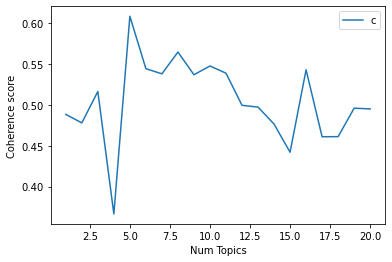

In [102]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [103]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.488308
Num Topics = 2  has Coherence Value of 0.477908
Num Topics = 3  has Coherence Value of 0.516335
Num Topics = 4  has Coherence Value of 0.366442
Num Topics = 5  has Coherence Value of 0.608494
Num Topics = 6  has Coherence Value of 0.544306
Num Topics = 7  has Coherence Value of 0.537978
Num Topics = 8  has Coherence Value of 0.564637
Num Topics = 9  has Coherence Value of 0.536896
Num Topics = 10  has Coherence Value of 0.547558
Num Topics = 11  has Coherence Value of 0.538769
Num Topics = 12  has Coherence Value of 0.499439
Num Topics = 13  has Coherence Value of 0.497216
Num Topics = 14  has Coherence Value of 0.47649
Num Topics = 15  has Coherence Value of 0.441989
Num Topics = 16  has Coherence Value of 0.542905
Num Topics = 17  has Coherence Value of 0.460905
Num Topics = 18  has Coherence Value of 0.461078
Num Topics = 19  has Coherence Value of 0.495877
Num Topics = 20  has Coherence Value of 0.495035


In [104]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.029*"wariatetegede_wariabogor" + 0.020*"shemalebogor" + 0.020*"wariabogor" + 0.015*"availbekasi_availdepok" + 0.015*"openbojakarta_openbobandung" + 0.015*"wariavip" + 0.015*"wariacikarang_wariaciputat" + 0.015*"shemalebogor_wariacibinong" + 0.015*"wariabokinganjakarta_wariabintaro" + 0.015*"wariabokinganjakarta_wariabintaro_wariacikarang_wariaciputat"
Topic: 1 Word: 0.023*"bo" + 0.018*"vcscrot" + 0.017*"openvcsline" + 0.016*"dm" + 0.015*"realbo" + 0.013*"bispak" + 0.012*"openvcsreal_bojogja" + 0.012*"availbo" + 0.012*"vcscoli_vcsbugil" + 0.012*"vcskontol"
Topic: 2 Word: 0.031*"jam_vcscolmek" + 0.025*"openvcsreal_bojogja" + 0.025*"vcscoli_vcsbugil" + 0.022*"vcscrot" + 0.016*"jam" + 0.016*"ready_tarifnya_jam_vcscolmek" + 0.015*"tarifnya" + 0.015*"ready_tarifnya" + 0.015*"vcsasli" + 0.015*"vcscoli"
Topic: 3 Word: 0.022*"openbojakarta_openbobandung" + 0.020*"vcscrot" + 0.018*"openvcsreal_bojogja" + 0.018*"vcscoli_vcsbugil" + 0.017*"openvcsreal_open_availbandung_availjaksel

In [105]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_word-availvcs3.csv")
print(df)

None


In [106]:
top_words_per_topic

[(0, 'wariatetegede_wariabogor', 0.028522782),
 (0, 'shemalebogor', 0.020318767),
 (0, 'wariabogor', 0.020283496),
 (0, 'availbekasi_availdepok', 0.0154989185),
 (0, 'openbojakarta_openbobandung', 0.015383191),
 (0, 'wariavip', 0.0146155525),
 (0, 'wariacikarang_wariaciputat', 0.014598642),
 (0, 'shemalebogor_wariacibinong', 0.014596779),
 (0, 'wariabokinganjakarta_wariabintaro', 0.014595791),
 (0,
  'wariabokinganjakarta_wariabintaro_wariacikarang_wariaciputat',
  0.014594559),
 (1, 'bo', 0.02269871),
 (1, 'vcscrot', 0.018070558),
 (1, 'openvcsline', 0.016747843),
 (1, 'dm', 0.015723426),
 (1, 'realbo', 0.014980674),
 (1, 'bispak', 0.0133499),
 (1, 'openvcsreal_bojogja', 0.011984088),
 (1, 'availbo', 0.01194996),
 (1, 'vcscoli_vcsbugil', 0.011788104),
 (1, 'vcskontol', 0.011732874),
 (2, 'jam_vcscolmek', 0.03081079),
 (2, 'openvcsreal_bojogja', 0.025154362),
 (2, 'vcscoli_vcsbugil', 0.024802513),
 (2, 'vcscrot', 0.021758826),
 (2, 'jam', 0.015868424),
 (2, 'ready_tarifnya_jam_vcscolme

In [107]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim2.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.114603 -0.056458       1        1  27.791213
0     -0.089933  0.062552       2        1  22.054039
3      0.038035  0.034832       3        1  21.091568
2      0.113032  0.000314       4        1  18.457899
1      0.053469 -0.041241       5        1  10.605280, topic_info=                            Term       Freq      Total Category  logprob  \
230                jam_vcscolmek   9.000000   9.000000  Default  30.0000   
236             vcscoli_vcsbugil  10.000000  10.000000  Default  29.0000   
155     wariatetegede_wariabogor  10.000000  10.000000  Default  28.0000   
231          openvcsreal_bojogja  11.000000  11.000000  Default  27.0000   
21                            bo   6.000000   6.000000  Default  26.0000   
..                           ...        ...        ...      ...      ...   
183                          jam   0.804626   5

IndexError: list index out of range

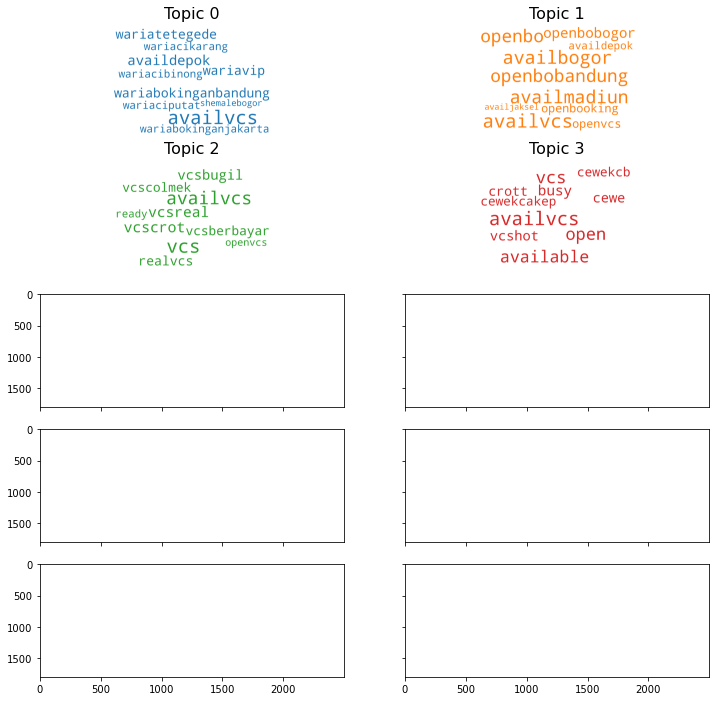

In [29]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(12,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()